<font size ="4">**Importing all the libraries**</font>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

<font size ="4">**Downloading the dataset and extracting it to the appropriate data directory.**</font>

<font size="4">**Read the data csv file**</font>

In [46]:
data_fake = pd.read_csv(r"Fake.csv")
data_true = pd.read_csv(r"True.csv")

In [44]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Assigning Classes to the Dataset

In [5]:
data_fake["class"] = 0
data_true["class"] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

Testing by changing the shape of the dataset

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)
    

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i], axis = 0, inplace = True)

In [8]:
data_fake.shape, data_true.shape

((23461, 5), (21417, 5))

In [9]:
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

/home/u194160/tmp/ipykernel_293074/4042680642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = 0
/home/u194160/tmp/ipykernel_293074/4042680642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = 1


In [10]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


[Text(0, 0, 'Middle-east')]

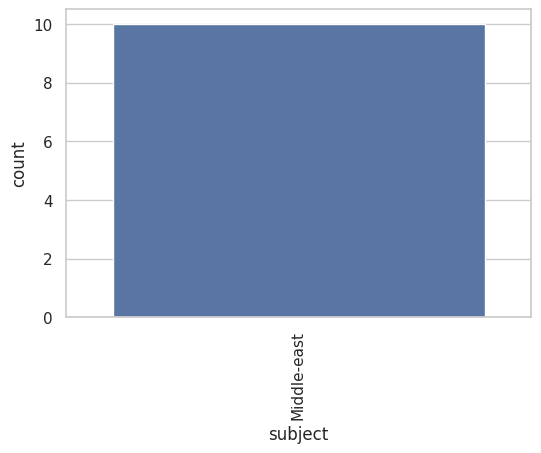

In [11]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data =data_fake_manual_testing)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


[Text(0, 0, 'worldnews')]

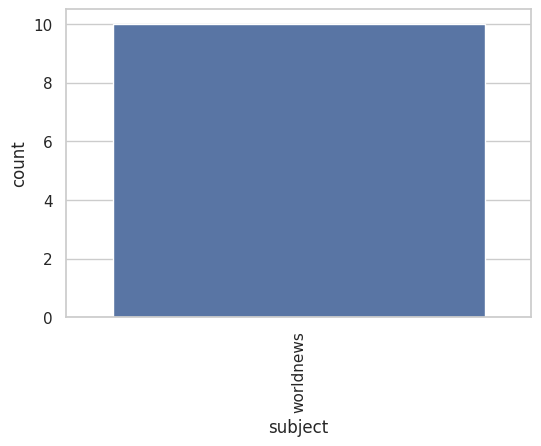

In [13]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data_true_manual_testing)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Merging Datasets

In [14]:
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


Visualization of the text data based on subject column

<Axes: xlabel='class', ylabel='count'>

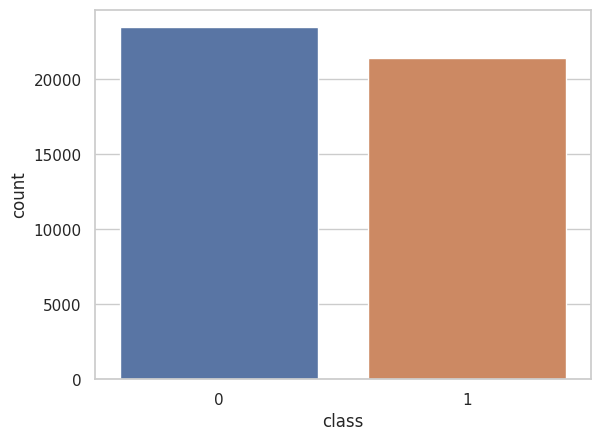

In [15]:
sns.countplot(data=data_merge, x='class', order=data_merge['class'].value_counts().index)

In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

Droping unwanted columns

In [17]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [18]:
data.isnull().sum()

text     0
class    0
dtype: int64

Random shuffling

In [19]:
data = data.sample(frac = 1)

In [20]:
data.head()

,text,class
6259,WASHINGTON (Reuters) - Representative Ryan Zin...,1
10468,CNN reported that they declined to expose a pr...,0
19324,DUBLIN (Reuters) - Ireland s foreign minister ...,1
4815,Donald Trump thought he hit a slam dunk with m...,0
20455,First the mafia announced that they re all don...,0


In [21]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [22]:
data.columns

Index(['text', 'class'], dtype='object')

In [23]:
data.head()

,text,class
0,WASHINGTON (Reuters) - Representative Ryan Zin...,1
1,CNN reported that they declined to expose a pr...,0
2,DUBLIN (Reuters) - Ireland s foreign minister ...,1
3,Donald Trump thought he hit a slam dunk with m...,0
4,First the mafia announced that they re all don...,0


To process the text

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '',text)
    return text

In [25]:
data ['text'] = data['text'].apply(wordopt)

Analyzation of data using bargraph of frequent words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

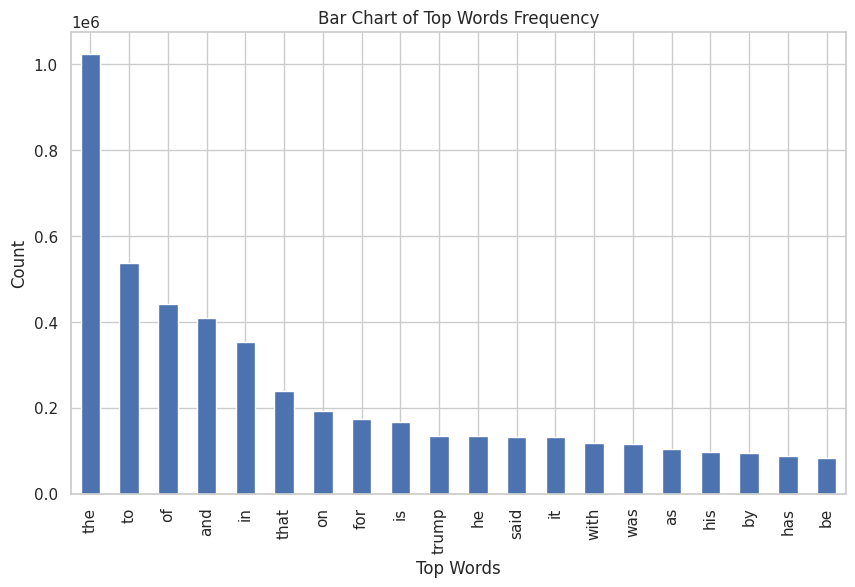

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6),xlabel="Top Words",ylabel="Count",title="Bar Chart of Top Words Frequency")

In [31]:
x = data['text']
y = data['class']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

Text to vectors

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9862745098039216

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5785
           1       0.98      0.99      0.99      5435

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



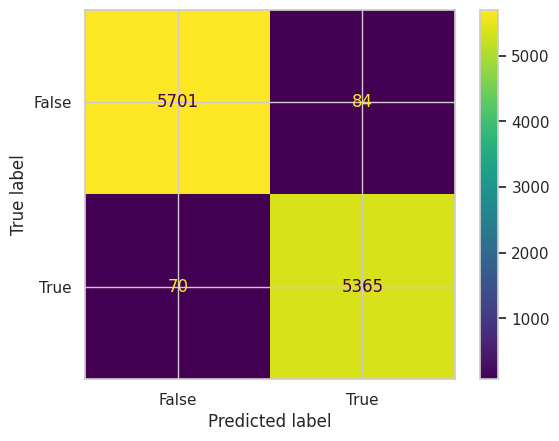

In [49]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, LR.predict(xv_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()


DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_dt = DT.predict(xv_test)

In [47]:
DT.score(xv_test, y_test)

0.9957219251336898

In [41]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5785
           1       1.00      0.99      1.00      5435

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



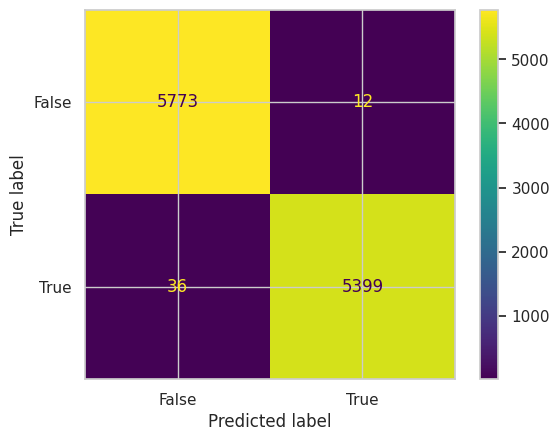

In [48]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, DT.predict(xv_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()


GRADIENT BOOSTING

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
pred_gb = GB.predict(xv_test)

In [52]:
GB.score(xv_test, y_test)

0.9950089126559715

In [53]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5785
           1       0.99      1.00      0.99      5435

    accuracy                           1.00     11220
   macro avg       0.99      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



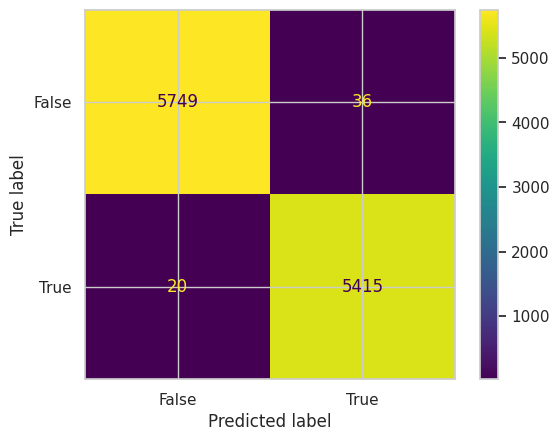

In [54]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, GB.predict(xv_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()


RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
pred_rf = RF.predict(xv_test)

In [57]:
RF.score(xv_test, y_test)

0.9898395721925134

In [58]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5785
           1       0.99      0.99      0.99      5435

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



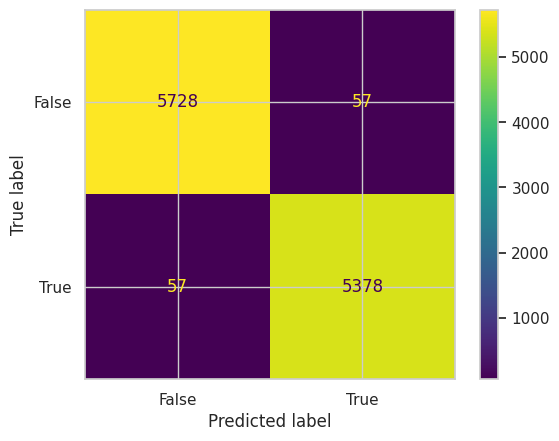

In [60]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, RF.predict(xv_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()


In [61]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [62]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RF.predict(new_xv_test)

    return print("\nRFC Prediction: {}".format(output_lable(pred_RFC[0])))

In [63]:
def manual_testing2(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("\nLR Prediction: {}".format(output_lable(pred_LR[0])))

In [64]:
def manual_testing3(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\nDT Prediction: {}".format(output_lable(pred_DT[0])))

In [65]:
def manual_testing4(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_GB = GB.predict(new_xv_test)

    return print("\nGB Prediction: {}".format(output_lable(pred_GB[0])))

In [ ]:
news=str(input())
manual_testing(news)
manual_testing2(news)
manual_testing3(news)
manual_testing4(news)